In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_sal = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
df_sal.drop('Unnamed: 0', axis=1, inplace=True)
df_sal.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [ ]:
# базовые статистики

def analyze_numerical_data(df,numerical_columns):
# Расчет основных статистик для числовых столбцов
    statistics = df[numerical_columns].describe()
    return statistics

statistics_for_numeric = analyze_numerical_data(df_sal, ['Age','Years of Experience','Salary'])
statistics_for_numeric



,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


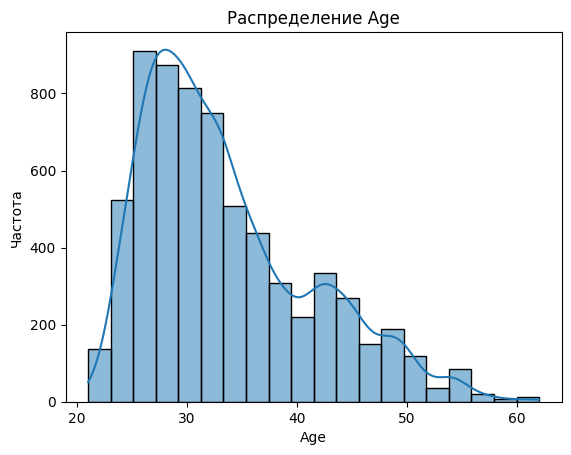

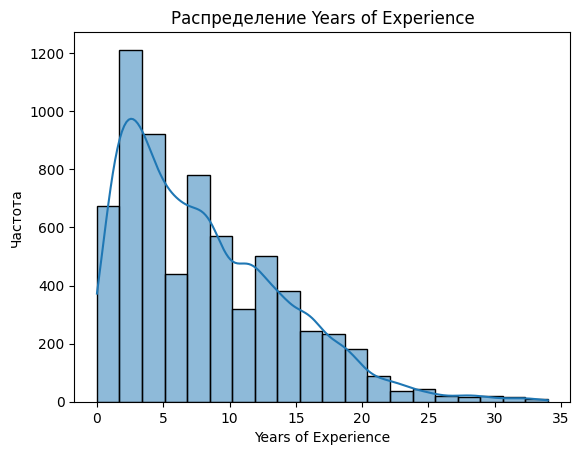

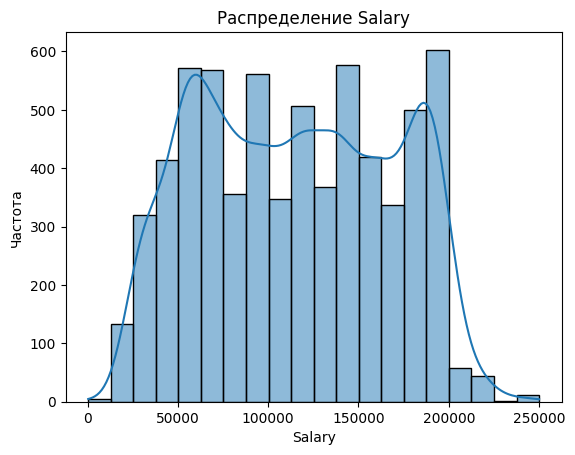

In [ ]:
# Построение гистограмм для числовых данных
for column in ['Age', 'Years of Experience', 'Salary']:
    sns.histplot(df_sal[column], kde=True, bins=20)
    plt.title(f"Распределение {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()


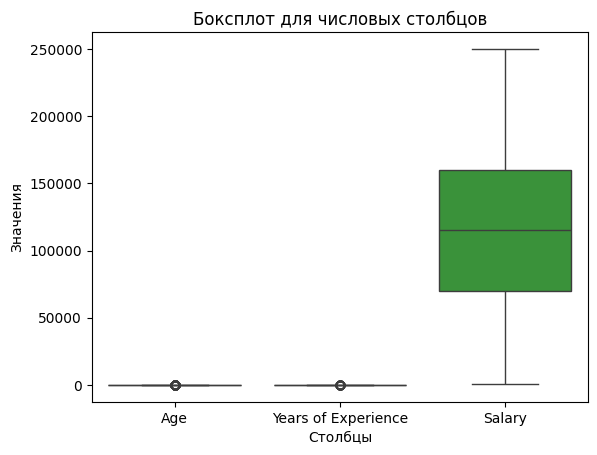

In [ ]:
# Построение boxplot для числовых данных
sns.boxplot(data=df_sal[['Age', 'Years of Experience', 'Salary']])
plt.title("Боксплот для числовых столбцов")
plt.xlabel("Столбцы")
plt.ylabel("Значения")
plt.show()


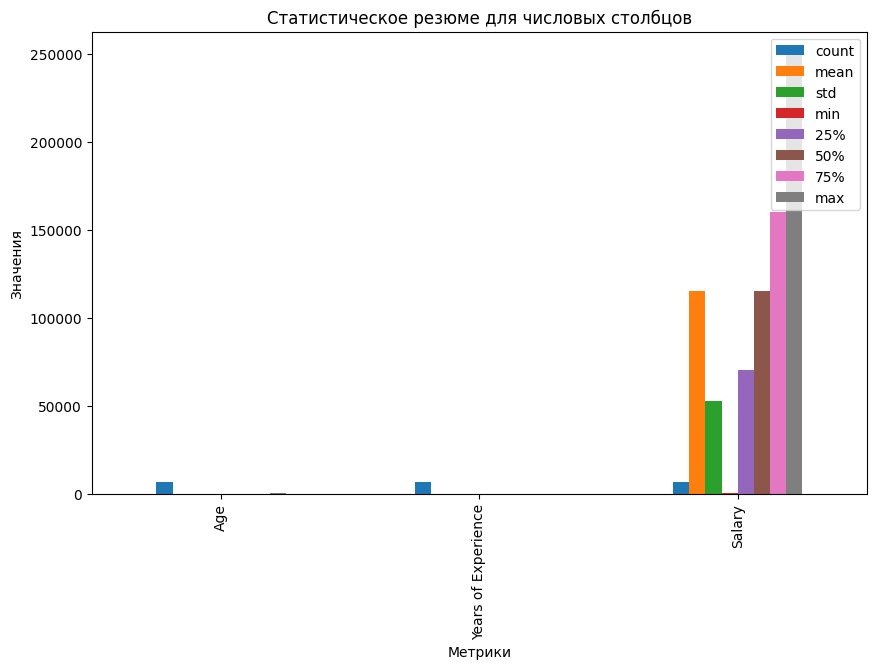

In [ ]:
# Построение столбчатой диаграммы для статистических данных числовых столбцов
statistics_for_numeric.T.plot(kind='bar', figsize=(10, 6))
plt.title("Статистическое резюме для числовых столбцов")
plt.ylabel("Значения")
plt.xlabel("Метрики")
plt.legend(loc="upper right")
plt.show()

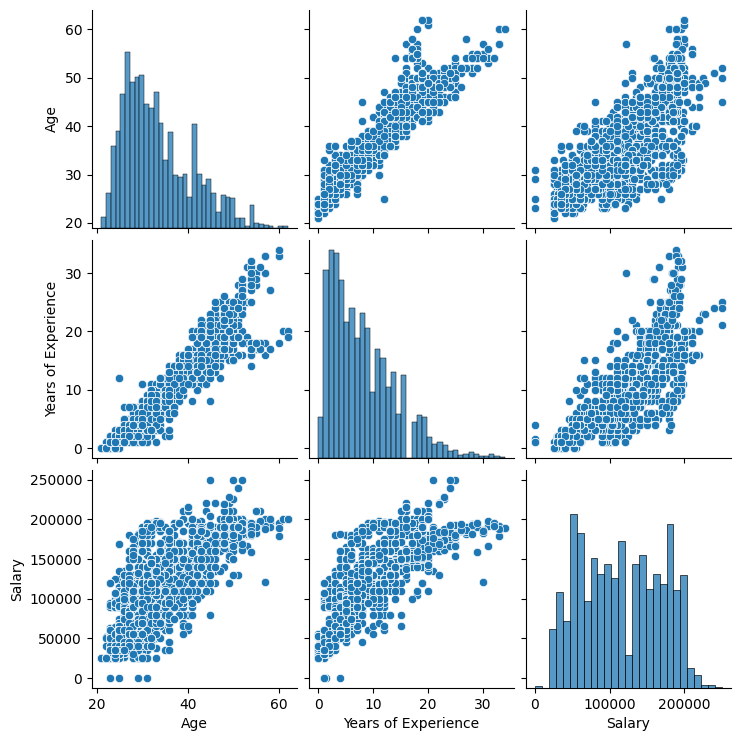

In [ ]:
# Взаимосвязь между числовыми данными
sns.pairplot(df_sal[['Age', 'Years of Experience', 'Salary']])
plt.show()


In [ ]:
def analyze_categorical_data(df_selected, categorical_columns):
    # Список для записи результатов
    analysis_results = []

    # Анализ категориальных данных
    for column in categorical_columns:
        mode_value = df_selected[column].mode()[0]  # Мода (самое частое значение)
        unique_values = df_selected[column].unique()  # Уникальные значения
        null_counts = df_selected[column].isnull().sum()  # Количество пропусков
        value_counts = df_selected[column].value_counts(dropna=False).to_dict()  # Распределение значений

        # Добавляем результаты в список
        analysis_results.append({
            "Столбец": column,
            "Мода": mode_value,
            "Уникальные значения": unique_values,
            "Пропуски": null_counts,
            "Распределение": value_counts
        })

    # Создаем DataFrame для результатов
    analysis_df = pd.DataFrame(analysis_results)
    return analysis_df

In [ ]:
statistics_for_categorical = analyze_categorical_data(df_sal, ['Gender', 'Education Level', 'Job Title', 'Country', 'Race'])
statistics_for_categorical

,Столбец,Мода,Уникальные значения,Пропуски,Распределение
0,Gender,Male,"[Male, Female, nan, Other]",2,"{'Male': 3674, 'Female': 3014, 'Other': 14, na..."
1,Education Level,Bachelor's,"[Bachelor's, Master's, PhD, nan, High School]",3,"{'Bachelor's': 3023, 'Master's': 1861, 'PhD': ..."
2,Job Title,Software Engineer,"[Software Engineer, Data Analyst, Senior Manag...",2,"{'Software Engineer': 518, 'Data Scientist': 4..."
3,Country,USA,"[UK, USA, Canada, China, Australia]",0,"{'USA': 1360, 'China': 1343, 'UK': 1337, 'Aust..."
4,Race,White,"[White, Hispanic, Asian, Korean, Chinese, Aust...",0,"{'White': 1968, 'Asian': 1603, 'Korean': 457, ..."


у нас есть пропуски в столбце гендер и столбце название должности

есть пропуски в образовании, а также в этом столбце есть не единообразие написание некоторых категорий. Например, Bachelor's Degree и Bachelor's - это одно и тоже. также PhD == phD. поэтому эти пункты мы можем объединить, чтобы получить статистику и графики более точно

In [ ]:
df_sal['Education Level'] = df_sal['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

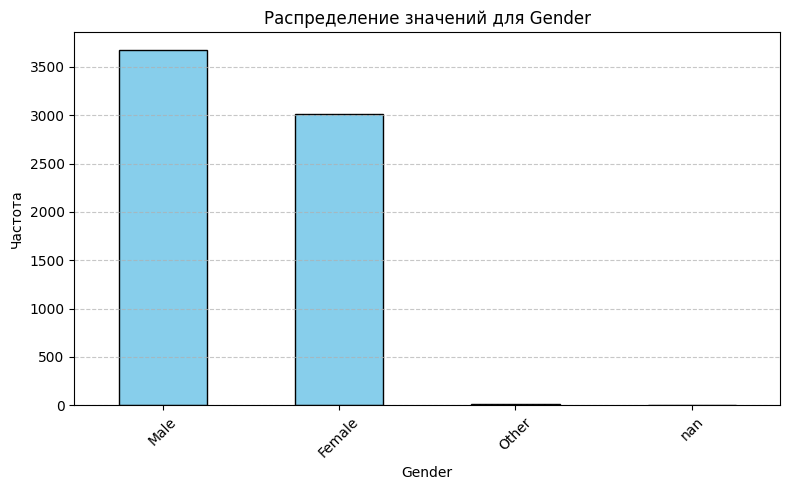

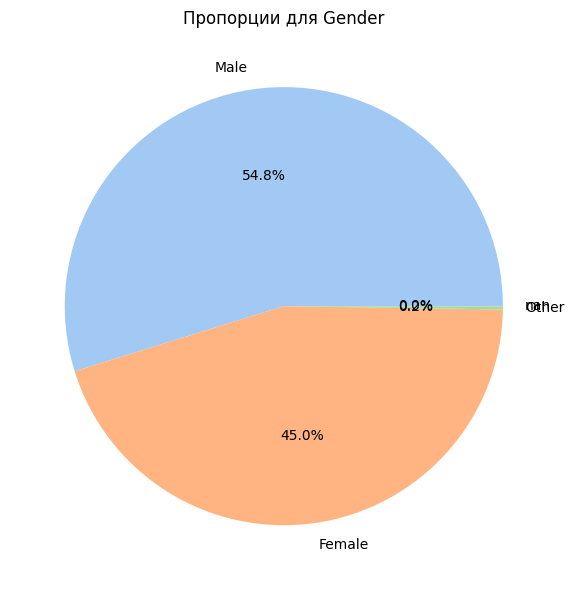

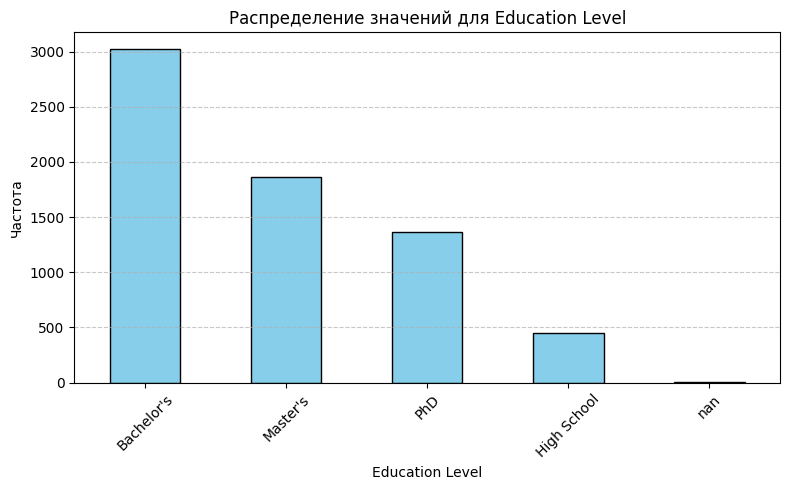

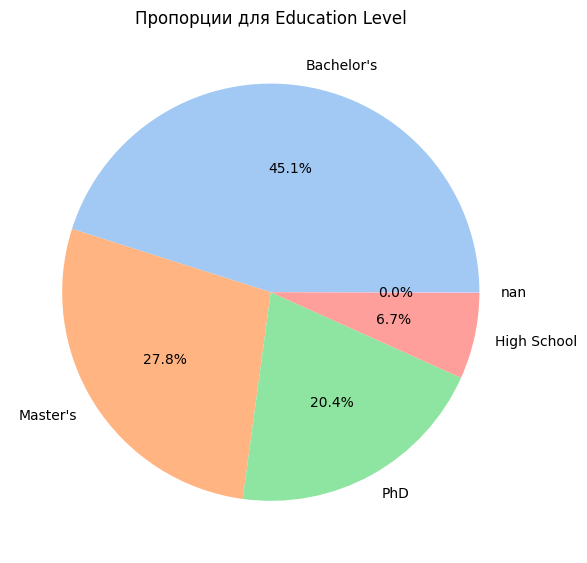

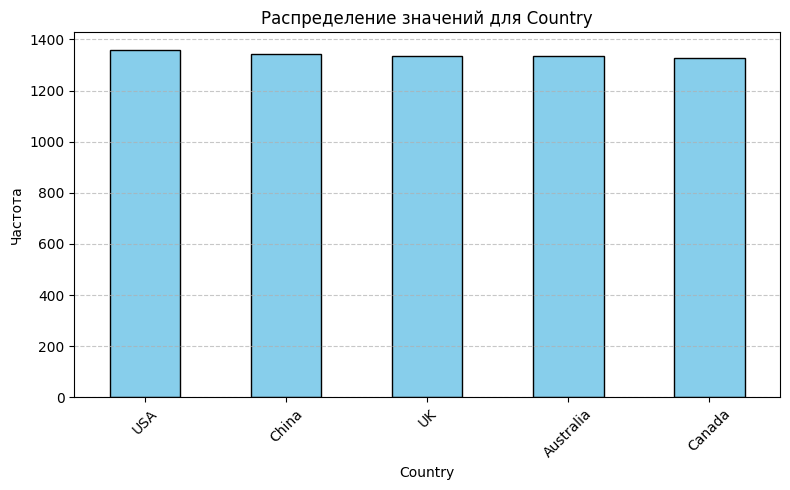

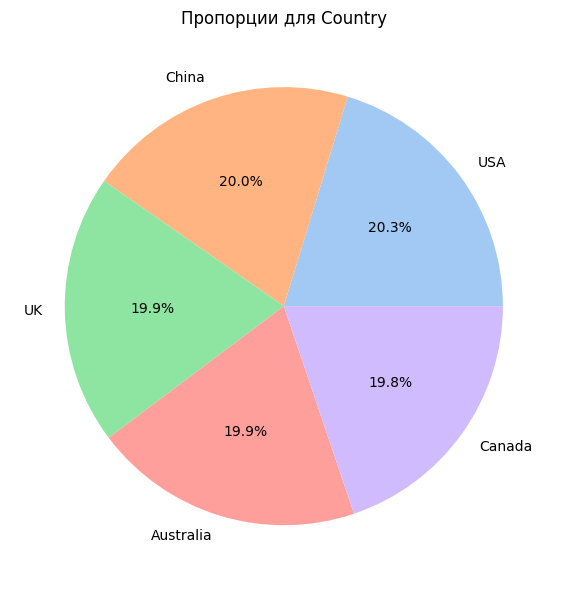

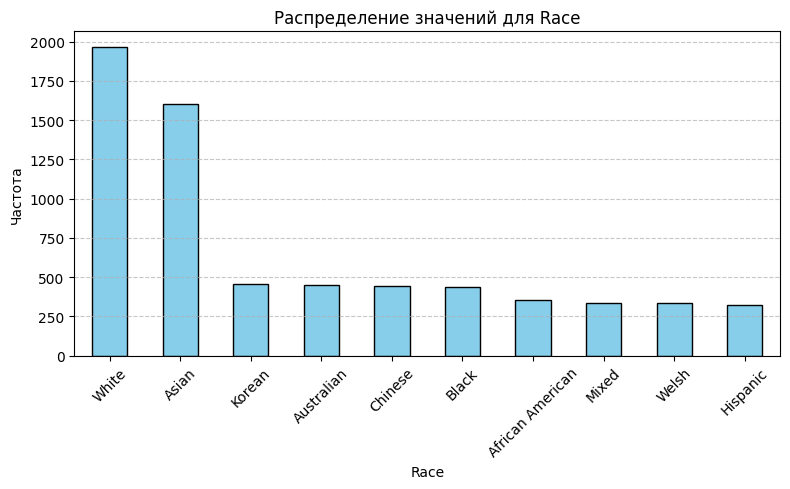

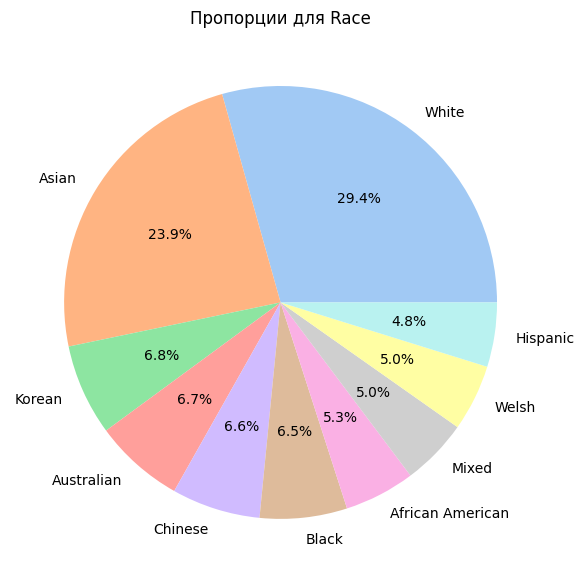

In [ ]:
# Пример визуализации для анализа категориальных данных
categorical_columns = ['Gender', 'Education Level', 'Country', 'Race']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))

    # Распределение значений (столбчатая диаграмма)
    df_sal[column].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Распределение значений для {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Круговая диаграмма (опционально)
    plt.figure(figsize=(6, 6))
    df_sal[column].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f"Пропорции для {column}")
    plt.ylabel("")  # Убираем подпись оси Y
    plt.tight_layout()
    plt.show()

Так как Job Title имеет множество значений привычные графики будет нечитаемы, поэтому мы выведем только топ-10 значений из этого столбца. в горинзонтальную диаграмму для более удобного чтения

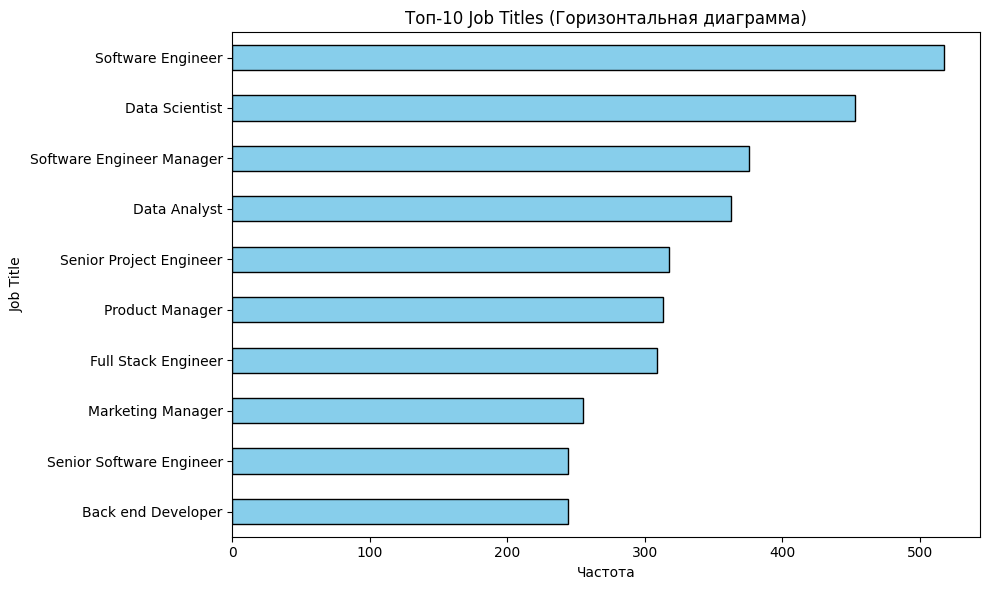

In [ ]:

top_n = 10
job_title_counts = df_sal['Job Title'].value_counts().head(top_n)

# Топ-10 Job Titles с горизонтальной диаграммой
plt.figure(figsize=(10, 6))
job_title_counts.head(10).sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Топ-10 Job Titles (Горизонтальная диаграмма)")
plt.xlabel("Частота")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


In [ ]:
def find_outliers(df):
    outliers = {}

    # Для каждого числового столбца ищем выбросы
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Находим выбросы
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Добавляем данные о выбросах в словарь
        outliers[column] = outlier_data if not outlier_data.empty else None

    return outliers

# Поиск выбросов
outliers = find_outliers(df_sal)
# Вывод информации о выбросах
print("\nАнализ выбросов:")
for column, rows in outliers.items():
    if rows is not None:
        print(f"\nСтолбец '{column}':")
        print(f"Количество выбросов: {len(rows)}")
        print("\nПервые несколько строк с выбросами:")
        display(rows)
    else:
        print(f"\nСтолбец '{column}': Выбросы отсутствуют.")



Анализ выбросов:

Столбец 'Age':
Количество выбросов: 123

Первые несколько строк с выбросами:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0,UK,Welsh
1223,57.0,Male,PhD,Software Engineer Manager,18.0,195000.0,China,White
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0,UK,White
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0,China,Korean
1240,55.0,Male,PhD,Software Engineer Manager,17.0,190000.0,USA,African American
...,...,...,...,...,...,...,...,...
3058,54.0,Male,Master's,Senior Software Engineer,32.0,195270.0,Canada,Asian
3067,54.0,Male,Bachelor's,Full Stack Engineer,25.0,179756.0,UK,Mixed
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0,China,Chinese
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia,Australian



Столбец 'Years of Experience':
Количество выбросов: 75

Первые несколько строк с выбросами:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,Canada,White
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Australia,Australian
2392,52.0,Female,Master's,Senior Software Engineer,28.0,186963.0,Australia,Australian
2396,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0,China,White
2398,58.0,Male,Master's,Senior Software Engineer,27.0,190004.0,China,White
...,...,...,...,...,...,...,...,...
3076,52.0,Male,PhD,Software Engineer Manager,26.0,185982.0,Canada,Asian
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0,China,Chinese
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0,Australia,Australian
3120,54.0,Male,PhD,Software Engineer Manager,28.0,182013.0,USA,African American



Столбец 'Salary': Выбросы отсутствуют.


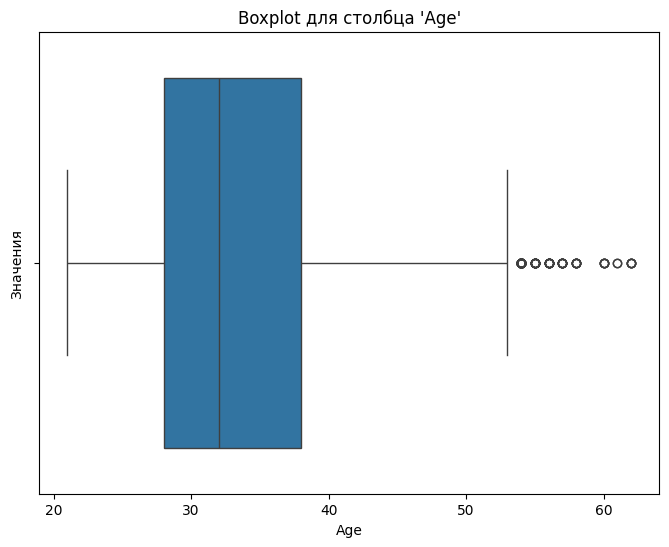

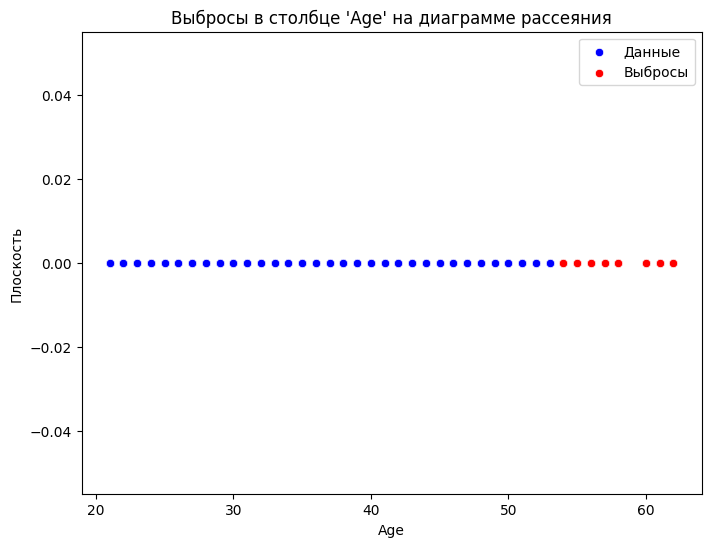

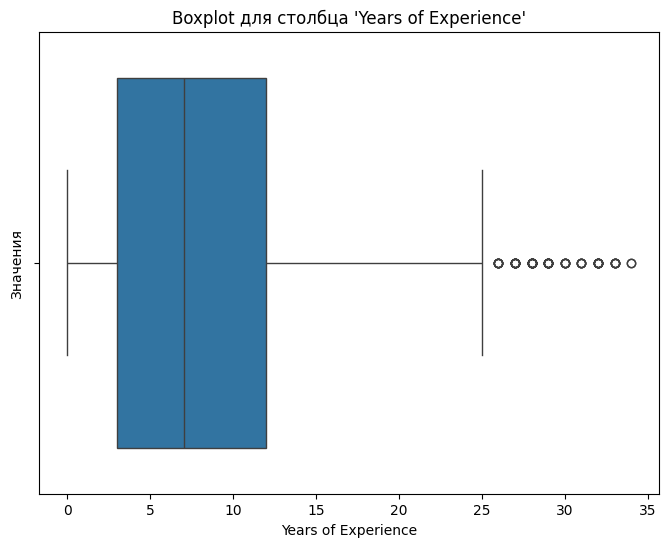

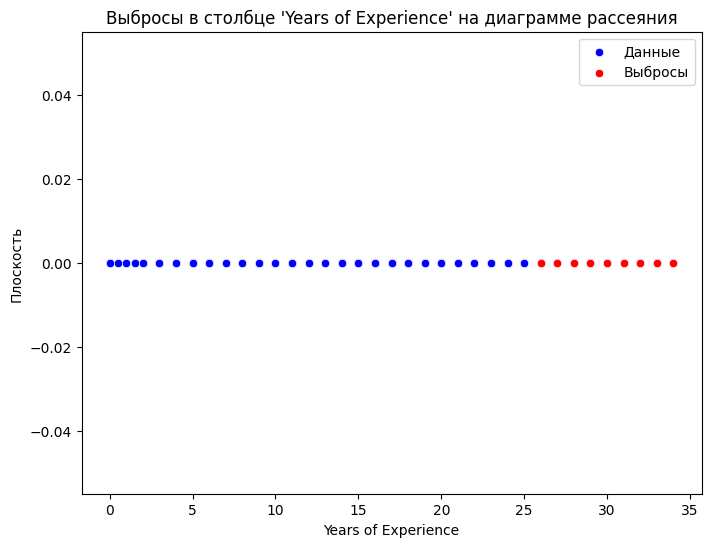

In [ ]:
def visualize_outliers(df, outliers):
    # Графики для каждого столбца с выбросами
    for column, rows in outliers.items():
        if rows is not None:
            # Boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot для столбца '{column}'")
            plt.xlabel(column)
            plt.ylabel("Значения")
            plt.show()

            # Выбросы на scatter plot
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[column], y=[0]*len(df[column]), color='blue', label='Данные')
            sns.scatterplot(x=rows[column], y=[0]*len(rows[column]), color='red', label='Выбросы')
            plt.title(f"Выбросы в столбце '{column}' на диаграмме рассеяния")
            plt.xlabel(column)
            plt.ylabel("Плоскость")
            plt.legend()
            plt.show()

# Визуализация выбросов
visualize_outliers(df_sal, outliers)

Выборсы в age - потому что возврастных сотрудников не так много в компании по сравнению с другими возрастами

Выбросы в years of experience - потому что сотрудников с таким большим  опытом не так много в компании по сравнению с другими опытом

Мои вопросы к данным:
1) можно растянуть на несколько графиков :). но интересно просмотреть как возраст,раса,гендер,страна зависят на зарплату
2) растет ли зарплата с увеличением опыта работы
3) средняя зарплата у каждой должности
4) средняя зарплата у каждого гендера
5) какое образование на какой должности самое популярное
6) какое образование у какой расы

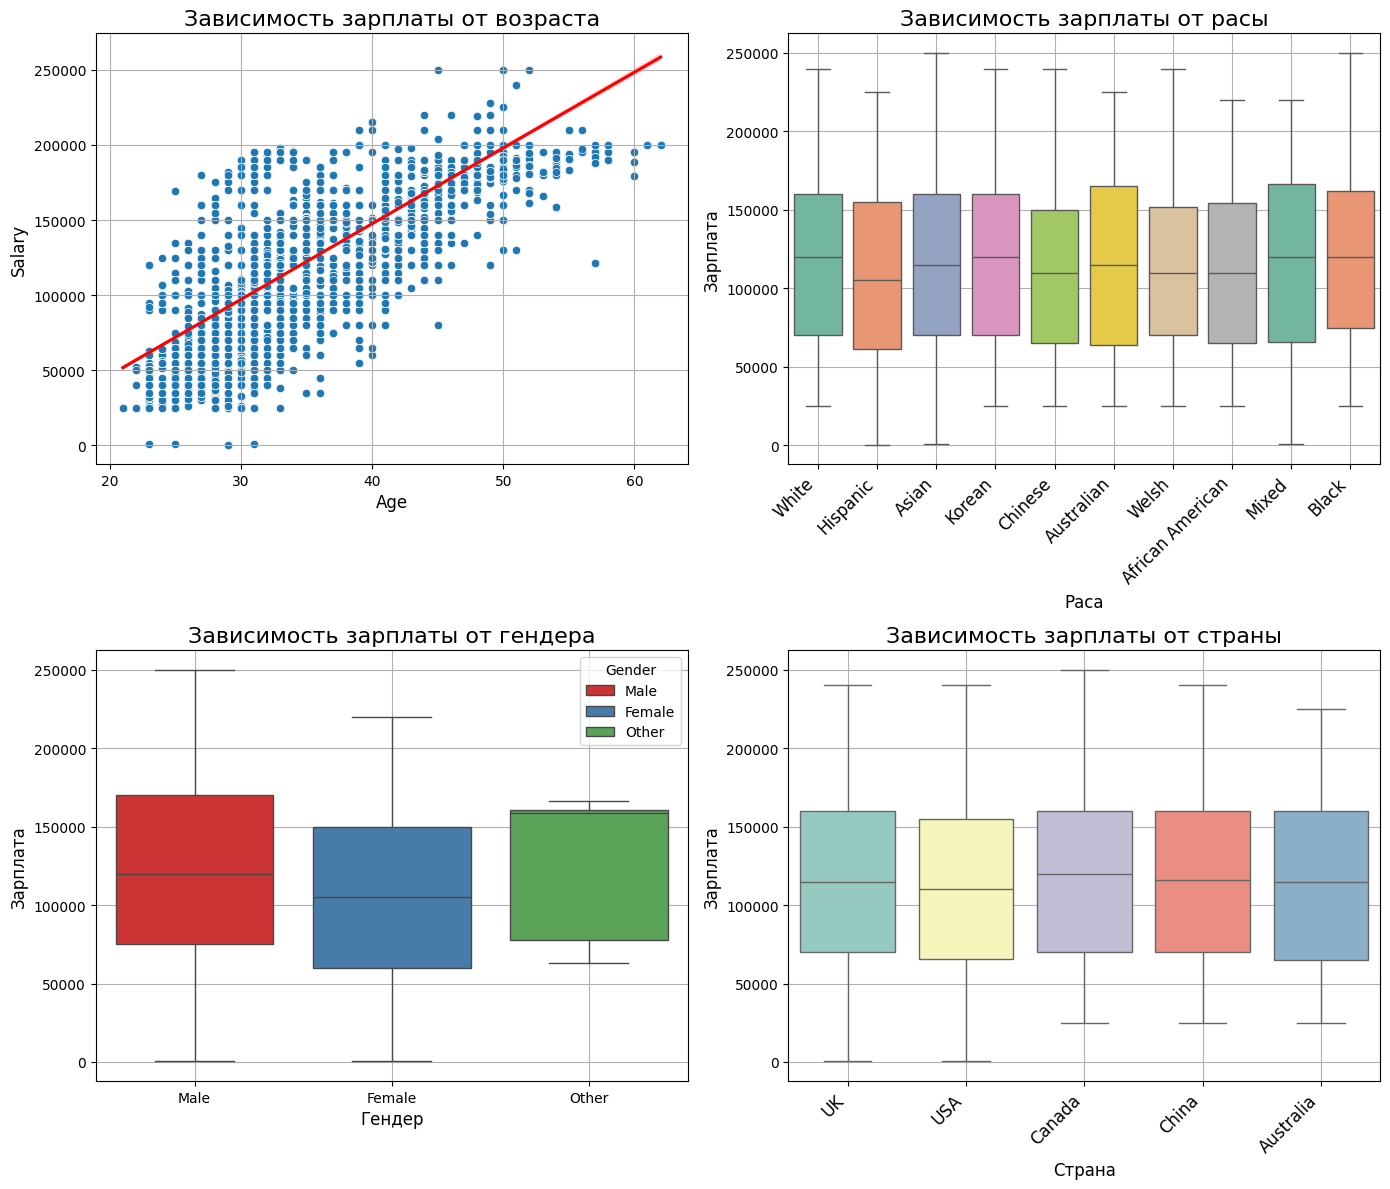

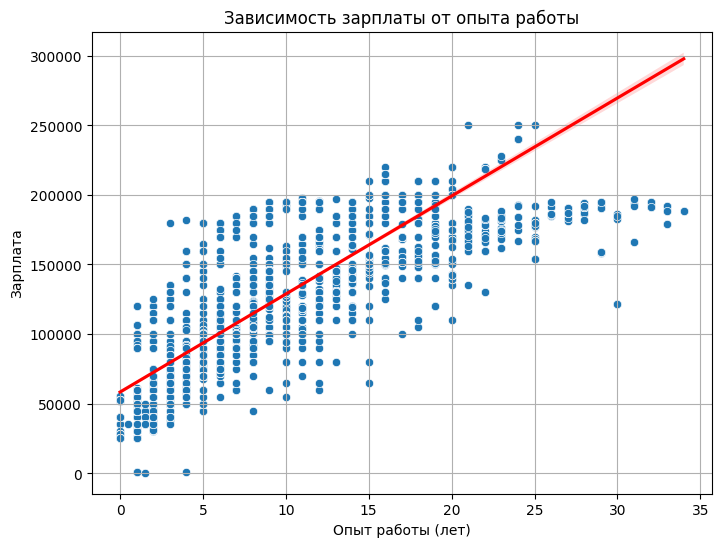

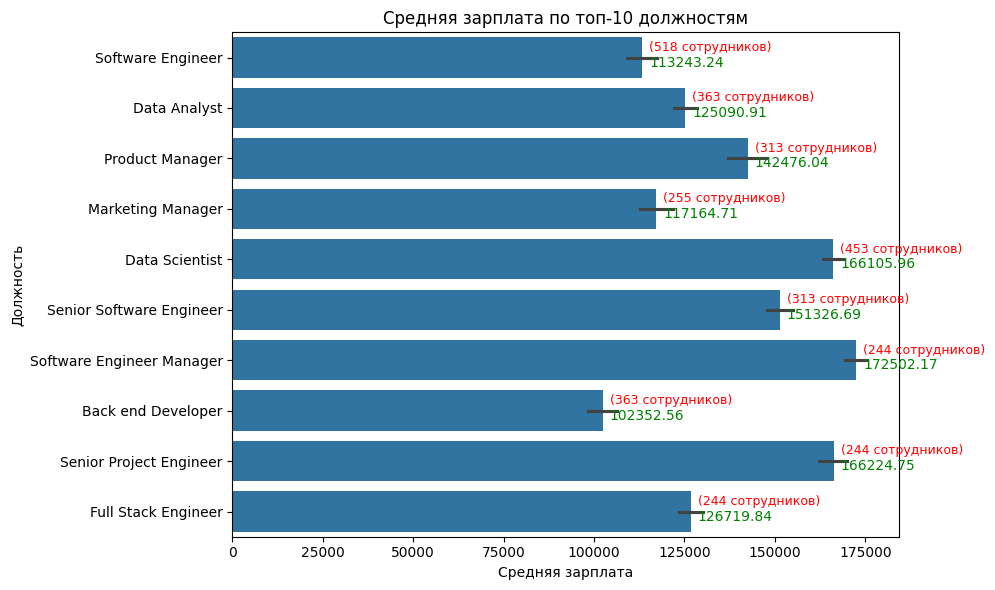

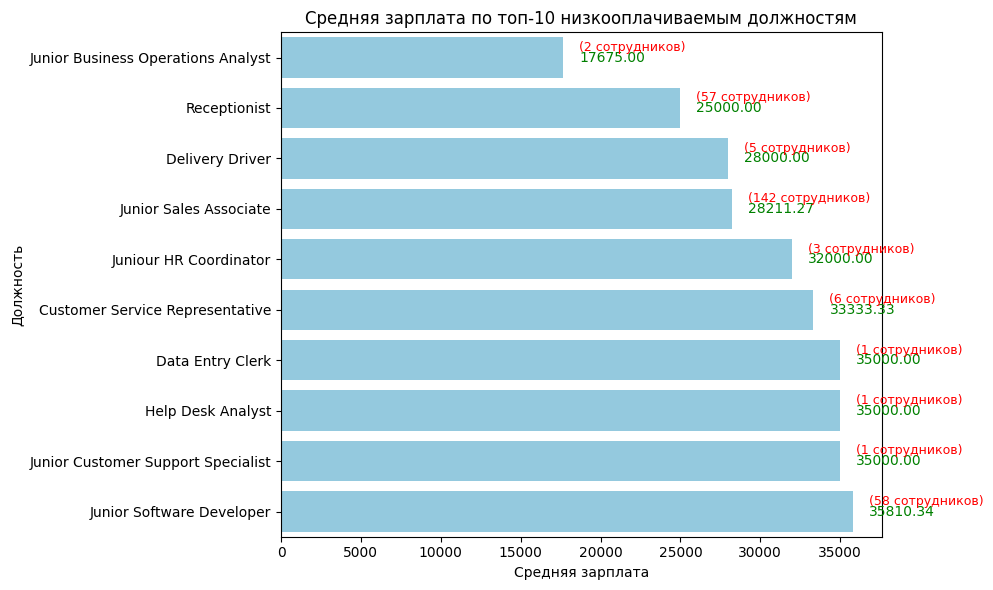

ValueError: Image size of 26013384x547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x600 with 1 Axes>

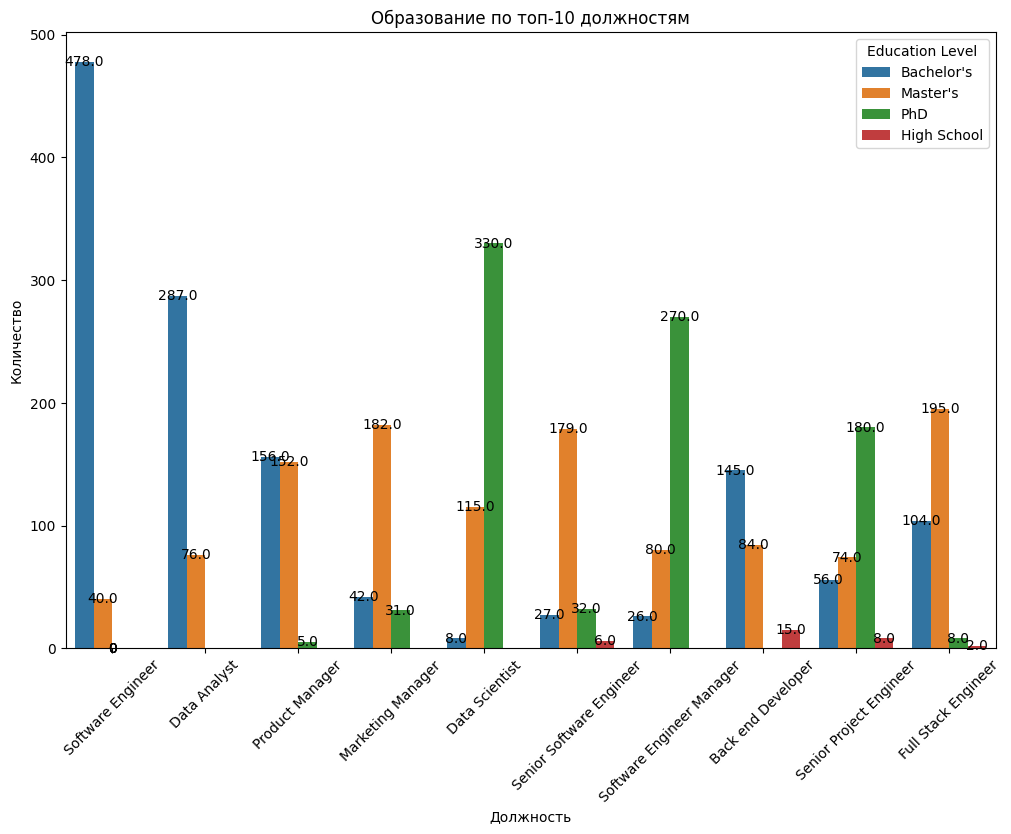

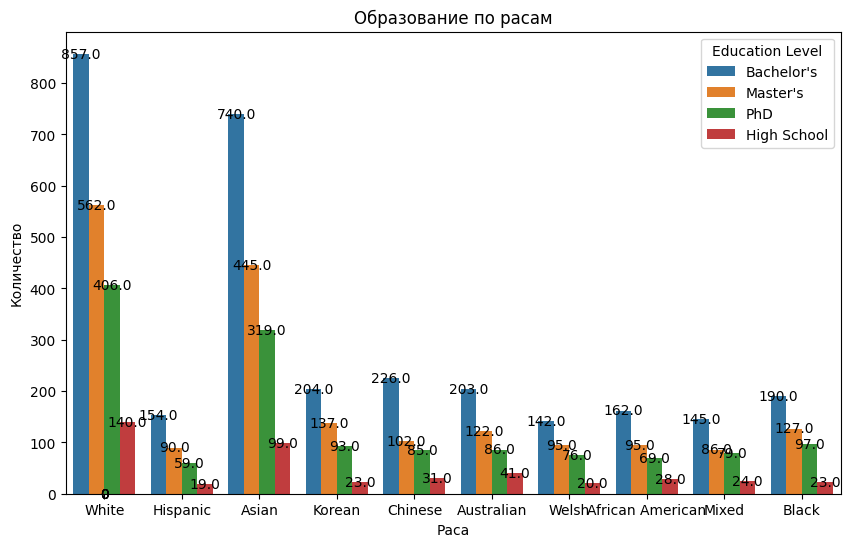

In [ ]:
# 1. Зависимость зарплаты от возраста, расы, гендера и страны
plt.figure(figsize=(14, 12))

# Scatter plot для возраста и зарплаты
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_sal['Age'], y=df_sal['Salary'])
plt.title("Зависимость зарплаты от возраста", fontsize=16)
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Зарплата", fontsize=12)
plt.grid(True)
sns.regplot(x=df_sal['Age'], y=df_sal['Salary'], scatter=False, color='red')

# Boxplot для расы и зарплаты
plt.subplot(2, 2, 2)
sns.boxplot(x='Race', y='Salary', data=df_sal, hue='Race', palette="Set2")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title("Зависимость зарплаты от расы", fontsize=16)
plt.xlabel("Раса", fontsize=12)
plt.ylabel("Зарплата", fontsize=12)
plt.grid(True)

# Boxplot для гендера и зарплаты
plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='Salary', data=df_sal, hue='Gender', palette="Set1")
plt.title("Зависимость зарплаты от гендера", fontsize=16)
plt.xlabel("Гендер", fontsize=12)
plt.ylabel("Зарплата", fontsize=12)
plt.grid(True)

# Boxplot для страны и зарплаты
plt.subplot(2, 2, 4)
sns.boxplot(x='Country', y='Salary', data=df_sal, hue='Country', palette="Set3")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title("Зависимость зарплаты от страны", fontsize=16)
plt.xlabel("Страна", fontsize=12)
plt.ylabel("Зарплата", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Растет ли зарплата с увеличением опыта работы?
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sal['Years of Experience'], y=df_sal['Salary'])
sns.regplot(x=df_sal['Years of Experience'], y=df_sal['Salary'], scatter=False, color='red')
plt.title("Зависимость зарплаты от опыта работы")
plt.xlabel("Опыт работы (лет)")
plt.ylabel("Зарплата")
plt.grid(True)
plt.show()

# 3. Средняя зарплата по должностям (с ограничением по топ-10 должностям)
top_job_titles = df_sal['Job Title'].value_counts().nlargest(10).index
df_top_jobs = df_sal[df_sal['Job Title'].isin(top_job_titles)]
job_counts = df_top_jobs['Job Title'].value_counts()

plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(x='Salary', y='Job Title', data=df_top_jobs, estimator='mean')
plt.title("Средняя зарплата по топ-10 должностям")
plt.xlabel("Средняя зарплата")
plt.ylabel("Должность")

for index, patch in enumerate(sns_barplot.patches):
    salary = patch.get_width()
    job = df_top_jobs['Job Title'].iloc[index]
    count = job_counts[job]
    sns_barplot.text(salary + 2000, patch.get_y() + patch.get_height() / 2 + 0.1,
                     f'{salary:.2f}', va='center', ha='left', color='green', fontsize=10)
    sns_barplot.text(salary + 2000, patch.get_y() + patch.get_height() / 2 - 0.2,
                     f'({count} сотрудников)', va='center', ha='left', color='red', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Средняя зарплата по самым низкооплачиваемым должностям
lowest_job_titles = df_sal.groupby('Job Title')['Salary'].mean().nsmallest(10)
df_lowest_jobs = df_sal[df_sal['Job Title'].isin(lowest_job_titles.index)]
job_counts = df_lowest_jobs['Job Title'].value_counts()

plt.figure(figsize=(10, 6))
sns_barplot = sns.barplot(x=lowest_job_titles.values, y=lowest_job_titles.index, color='skyblue')
plt.title("Средняя зарплата по топ-10 низкооплачиваемым должностям")
plt.xlabel("Средняя зарплата")
plt.ylabel("Должность")

for index, patch in enumerate(sns_barplot.patches):
    salary = patch.get_width()
    job = lowest_job_titles.index[index]
    count = job_counts[job]
    sns_barplot.text(salary + 1000, patch.get_y() + patch.get_height() / 2,
                     f'{salary:.2f}', va='center', ha='left', color='green', fontsize=10)
    sns_barplot.text(salary + 1000, patch.get_y() + patch.get_height() / 2 - 0.2,
                     f'({count} сотрудников)', va='center', ha='left', color='red', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Средняя зарплата по гендерам
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Salary', data=df_sal, estimator='mean')
plt.title("Средняя зарплата по гендерам")
plt.xlabel("Гендер")
plt.ylabel("Средняя зарплата")

for index, value in enumerate(df_sal.groupby('Gender')['Salary'].mean()):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')
plt.show()

# 6. Образование по топ-10 должностям
plt.figure(figsize=(12, 8))
sns.countplot(x='Job Title', hue='Education Level', data=df_top_jobs)
plt.title("Образование по топ-10 должностям")
plt.xlabel("Должность")
plt.ylabel("Количество")
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black')
plt.show()

# 7. Образование по расам
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', hue='Education Level', data=df_sal)
plt.title("Образование по расам")
plt.xlabel("Раса")
plt.ylabel("Количество")

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black')
plt.show()


## ВЫВОДЫ:

1) как правило в компании чем старше сотрудник, тем больше его зарпалата

2) в целом по расе зарплаты несильно коллеблятся

3) Мужчины получают больше чем женщины

4) разницы из какой страны сотрудники по компании нет

5) чем больше опыта работы у сотрудника в компании тем больше его зарплата

6) больше всего по компании получают software engineers managers

7) меньше всего junior business operations analyst

8) на должности data scientist больше всего докторов наук. и меньше всего бакалавров из топ 10 должностей

9) Азиаты и белые самые образованные по компании
